In [1]:
import collections
from collections import OrderedDict
import pandas as pd
import time as tm

In [2]:
run -i "base_compression.py"

In [3]:
run -i "box_car_algorithm.py"

In [4]:
run -i "swinging_door_algorithm.py"

In [5]:
run -i "hybrid_compression.py"

In [6]:
run -i "unordered_time_series_compressor.py"

# Example 1: Run thousands of data points

First showcase running thousands of data points, which represent some counter values from a software system.

In [7]:
data_size = 500
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [8]:
df = pd.read_csv('data/sample1_random.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
shuffled_df = df.sample(frac=1)

data = {}

for index, row in df.iterrows():
    data[index] = row['Counter']
    
df.head(10)

,Counter
Date,
2014-11-02 00:30:00,72.8
2014-10-04 02:00:00,74.0
2014-10-17 05:00:00,98.7
2014-11-03 15:45:00,225.8
2014-09-02 22:45:00,98.2
2014-10-08 03:15:00,89.3
2014-09-04 02:30:00,140.2
2014-09-19 00:15:00,78.3
2014-09-03 12:45:00,204.4


In [9]:
t0 = tm.time()

counter = 0

box_car_chunks = {}

for time, value in data.items():
    box_car_chunks[time] = value
    
    if counter is 50:
        box_car_compressor._compress_chunk(box_car_chunks)
        counter = 0
        box_car_chunks = {}
    else:
        counter += 1

if not box_car_chunks:
    box_car_compressor._compress_chunk(box_car_chunks)
    
box_car = box_car_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

for time, value in box_car.items():
    print("{} {}".format(time, value))


Initial deviation: 46.560942936661974
Initial deviation: 50.11603038295866
Initial deviation: 133.97952338856828
Initial deviation: 47.46354014624439
Initial deviation: 164.4045078899385
Initial deviation: 45.930749069784284
Initial deviation: 167.42727074190006
Initial deviation: 222.85571329989207
Initial deviation: 222.76582365259742
Initial deviation: 162.32820854523112
Initial deviation: 42.85793713952464
Initial deviation: 39.95150732240033
Initial deviation: 42.2143659802828
Initial deviation: 49.611261681793216
Initial deviation: 50.66149103960545
Initial deviation: 260.77113375215674
Initial deviation: 106.2192295991632
Initial deviation: 63.38802027951168
Initial deviation: 224.35302919068366
Initial deviation: 56.28547320957003
Initial deviation: 45.43307671535292
Initial deviation: 225.73411164025737
Initial deviation: 47.18740766087046
Initial deviation: 46.79557110258806
Initial deviation: 159.40148190553109
Initial deviation: 181.9113663243744
Initial deviation: 88.09366

In [10]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [11]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 130.3695367950793
Initial deviation: 146.04049152476767
Initial deviation: 128.39756901423328
> c:\users\sijian\repos\tsa\unordered_time_series_compressor.py(81)_final_compress()
-> compressed_data = self.final_compressor._run(self._chunks[0])
(Pdb) c
Initial deviation: 157.58666703523244
1.7091898918151855  seconds time elapsed in running exception.
5961 number of data points discarded as part of swinging door window
509 data points remaining


In [12]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [13]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 130.3695367950793
Initial deviation: 146.04049152476767
Initial deviation: 128.39756901423328
> c:\users\sijian\repos\tsa\unordered_time_series_compressor.py(81)_final_compress()
-> compressed_data = self.final_compressor._run(self._chunks[0])
(Pdb) c
Initial deviation: 157.58666703523244
1.265115737915039  seconds time elapsed in running exception.
5961 number of data points discarded as part of exception window
509 data points remaining


In [14]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


C:\Users\sijian\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'time', 'inf', 'indices', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


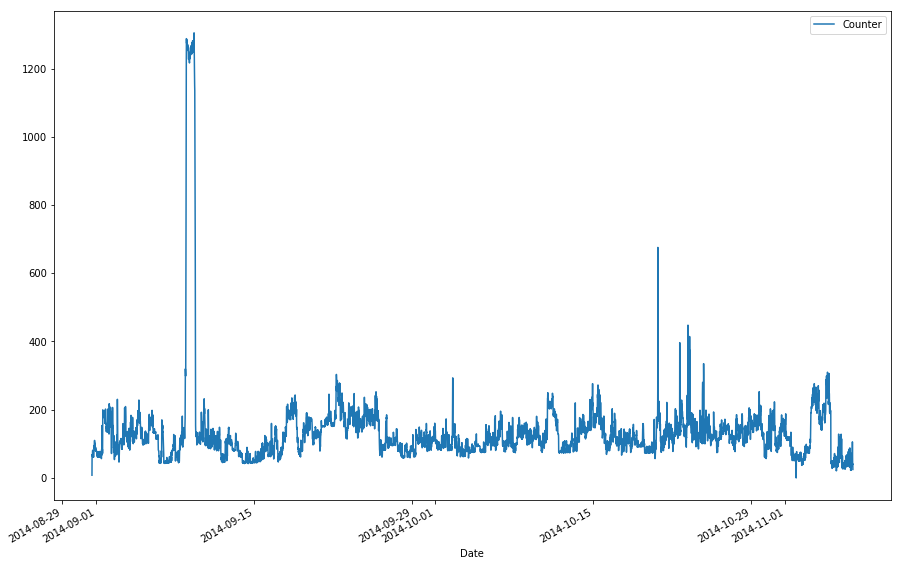

In [15]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


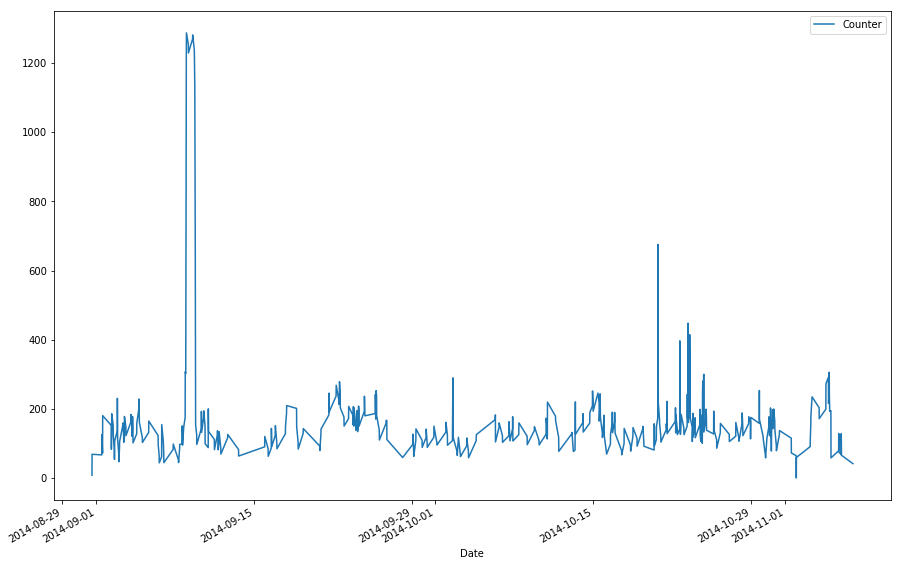

In [16]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


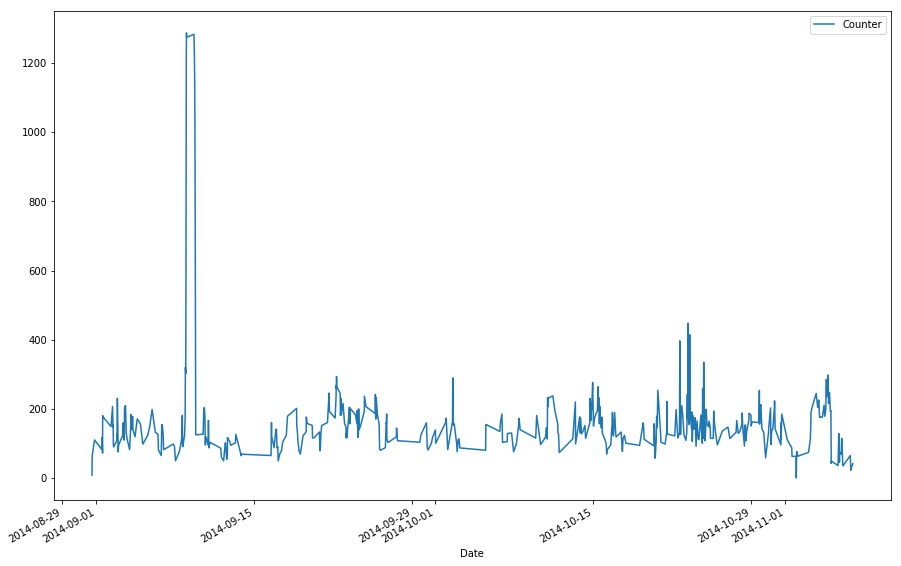

In [17]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


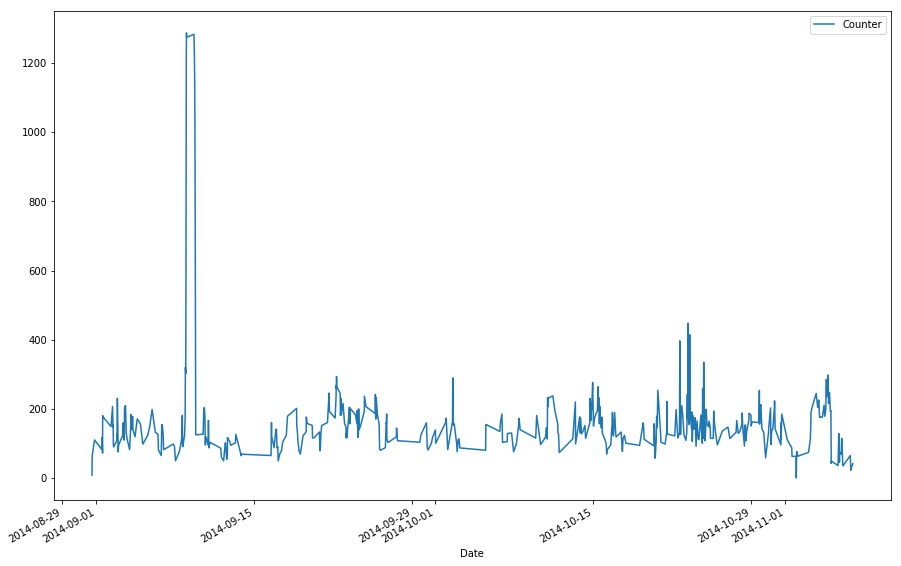

In [18]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()

# Example 2: Run tens of data points

Second showcase tens of float data points.

In [7]:
data_size = 30
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [8]:
df = pd.read_csv('data/sample2_random.csv', parse_dates=True, index_col=0)
df['Value'] = df['Value'].astype(float)
data = {}

for index, row in df.iterrows():
    data[index] = row['Value']

In [9]:
t0 = tm.time()

counter = 0

box_car_chunks = {}


for time, value in data.items():
    box_car_chunks[time] = value
    
    if counter is 50:
        box_car_compressor._compress_chunk(box_car_chunks)
        counter = 0
        box_car_chunks = {}
    else:
        counter += 1

if not box_car_chunks:
    box_car_compressor._compress_chunk(box_car_chunks)

box_car = box_car_compressor._final_compress()


t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

for time, value in box_car.items():
    print("{} {}".format(time, value))

Initial deviation: 12.477600999368645
Initial deviation: 17.395202393064217
0.009965181350708008  seconds time elapsed in running box car.
55 number of data points discarded as part of box car window
16 data points remaining
2017-11-27 16:00:00 89.2245255
2017-12-19 16:00:00 83.5225329
2017-12-20 16:00:00 78.1139537
2017-12-22 16:00:00 88.66369171
2018-01-22 16:00:00 93.59053655
2018-01-23 16:00:00 98.62678521
2018-01-24 16:00:00 83.50991615
2018-01-26 16:00:00 86.83908401
2018-01-29 16:00:00 100.0923188
2018-02-02 16:00:00 99.17641521
2018-02-05 16:00:00 87.54350023
2018-02-28 16:00:00 94.67511182
2018-03-01 16:00:00 99.65374081
2018-03-05 16:00:00 96.78787614
2018-03-08 00:00:00 42.87477253
2018-03-10 00:00:00 42.10425398


In [22]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [23]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 5.040540259889245
Initial deviation: 14.129960252678513
Initial deviation: 12.451320670145028
Initial deviation: 13.756626711903344
0.002923727035522461  seconds time elapsed in running exception.
38 number of data points discarded as part of swinging door window
33 data points remaining


In [24]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [25]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 5.040540259889245
Initial deviation: 14.129960252678513
Initial deviation: 12.451320670145028
Initial deviation: 13.756626711903344
0.0029268264770507812  seconds time elapsed in running exception.
38 number of data points discarded as part of exception window
33 data points remaining


In [26]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


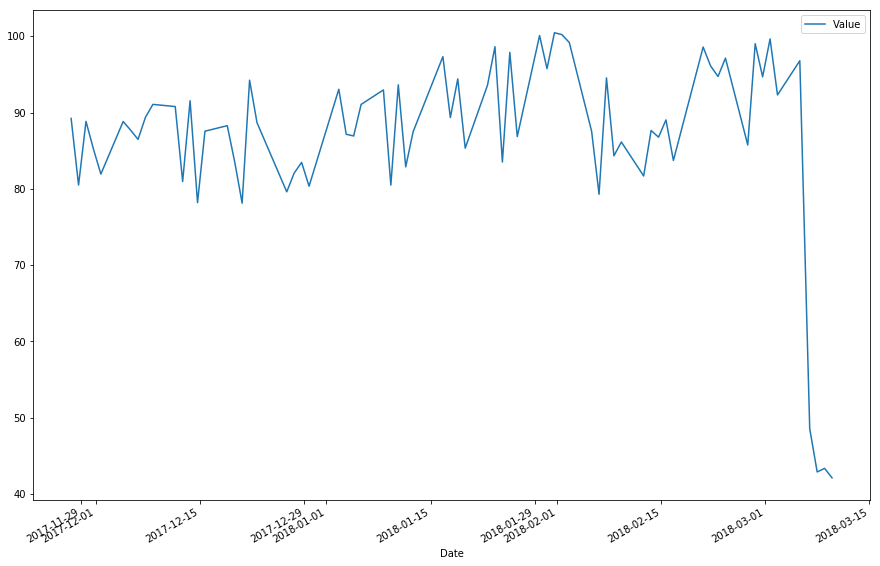

In [27]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


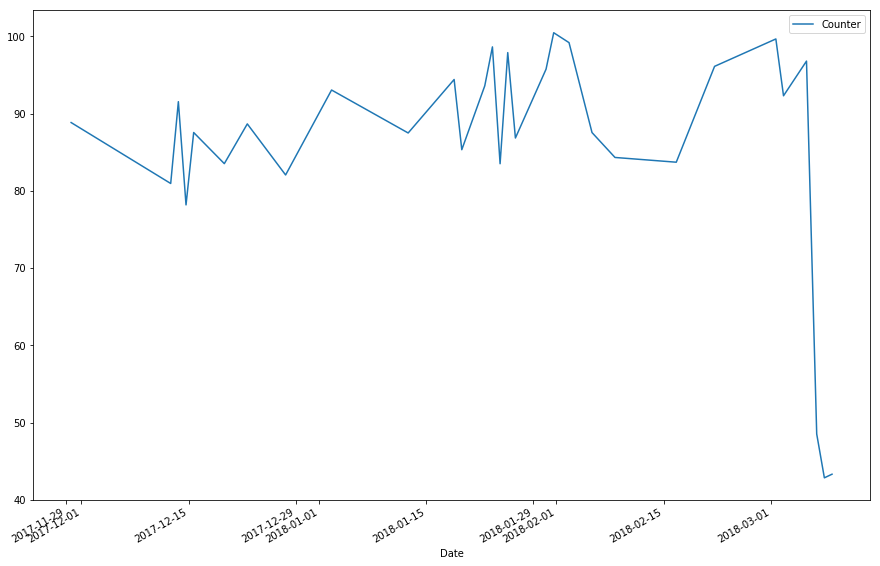

In [28]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


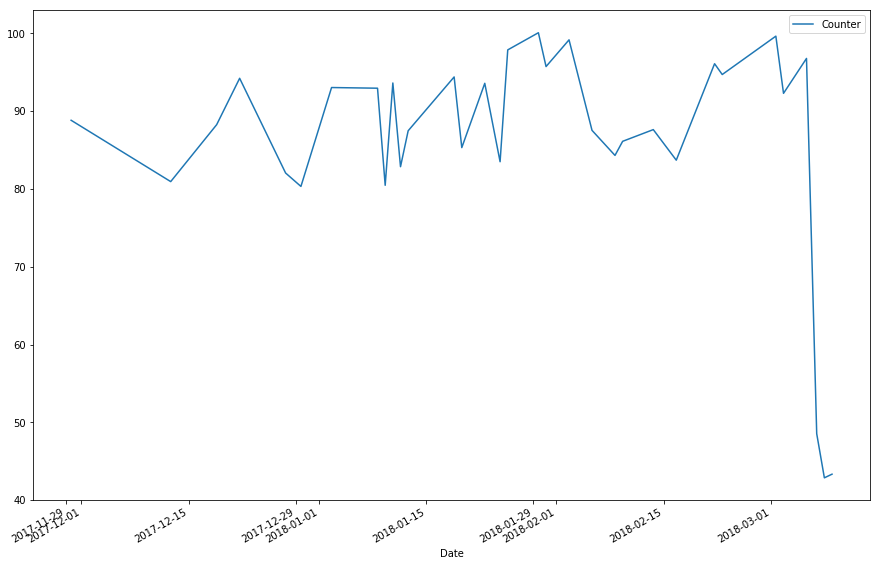

In [29]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


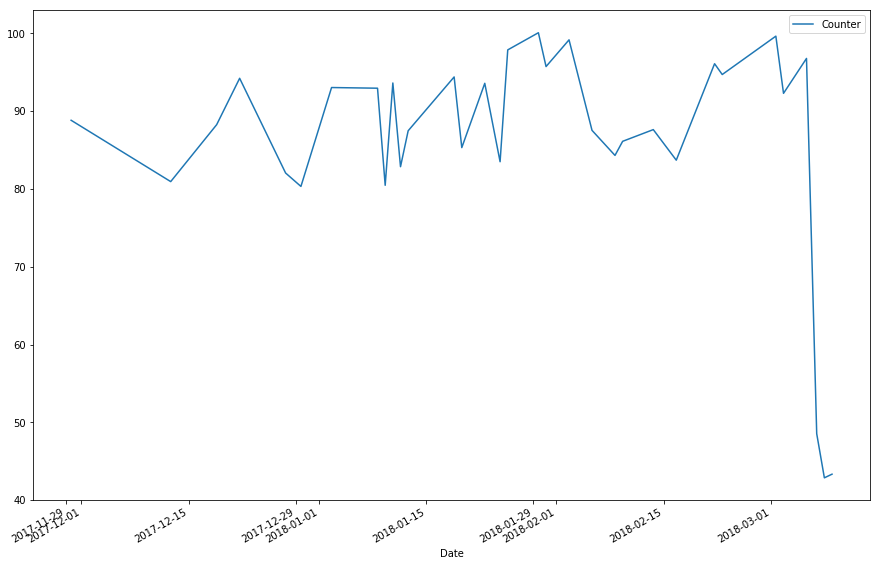

In [30]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()

# Example 3: Run millions of data points

Third showcase large dataset, random generated from excel with some range.

In [7]:
data_size = 500
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [14]:
df = pd.read_csv('data/sample3.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
data = {}

for index, row in df.iterrows():
    data[index] = row['Counter']

In [16]:
t0 = tm.time()

counter = 0

box_car_chunks = {}

'''
for time, value in data.items():
    box_car_chunks[time] = value
    
    if counter is 50:
        box_car_compressor._compress_chunk(box_car_chunks)
        counter = 0
        box_car_chunks = {}
    else:
        counter += 1

if not box_car_chunks:
    box_car_compressor._compress_chunk(box_car_chunks)
    
box_car = box_car_compressor._final_compress()
'''

box_car_compressor._compress_chunk(data)
box_car = box_car_compressor._final_compress()


t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

for time, value in box_car.items():
    print("{} {}".format(time, value))

Initial deviation: 144.47499155905456
Initial deviation: 145.40191468217617
Initial deviation: 143.9899471293366
Initial deviation: 145.45854289260947
Initial deviation: 144.2599602223706
Initial deviation: 144.1989286229218
Initial deviation: 144.2542851245345
Initial deviation: 144.71841275936492
Initial deviation: 145.03530021012833
Initial deviation: 144.37376672896758
Initial deviation: 144.37250241843037
Initial deviation: 143.9910081272761
Initial deviation: 145.1056562558446
Initial deviation: 144.8829899188938
Initial deviation: 145.2123032313407
Initial deviation: 144.9347802813043
Initial deviation: 143.8401644980941
Initial deviation: 144.1041241463883
Initial deviation: 144.893154794276
Initial deviation: 904.2651845488464
Initial deviation: 2881.23344065345
Initial deviation: 2886.1836226607506
Initial deviation: 2887.414744286539
Initial deviation: 2897.841769693798
Initial deviation: 2870.7352994306398
Initial deviation: 2912.263155871867
Initial deviation: 2889.0270834

In [34]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [35]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 37580.48086310743
Initial deviation: 37241.73101119615
Initial deviation: 37211.531382820234
Initial deviation: 37358.692756575525
Initial deviation: 37339.67313426685
Initial deviation: 36940.639978004845
Initial deviation: 37319.86663971218
Initial deviation: 37130.47858614521
Initial deviation: 37037.58490039479
Initial deviation: 37431.78291696022
Initial deviation: 37327.41052991744
Initial deviation: 37396.44481007922
Initial deviation: 37205.16169131961
Initial deviation: 37460.98544640913
Initial deviation: 37253.277134187025
Initial deviation: 37364.816577652164
Initial deviation: 37143.89288146089
Initial deviation: 37149.751202683816
Initial deviation: 36979.91122373647
Initial deviation: 37335.583313265546
Initial deviation: 37376.186698692865
Initial deviation: 37154.39944512031
Initial deviation: 36903.543204994814
Initial deviation: 37104.78447928967
Initial deviation: 37221.35806200415
Initial deviation: 36841.85535896369
Initial deviation: 37011.4163

In [36]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [37]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 37580.48086310743
Initial deviation: 37241.73101119615
Initial deviation: 37211.531382820234
Initial deviation: 37358.692756575525
Initial deviation: 37339.67313426685
Initial deviation: 36940.639978004845
Initial deviation: 37319.86663971218
Initial deviation: 37130.47858614521
Initial deviation: 37037.58490039479
Initial deviation: 37431.78291696022
Initial deviation: 37327.41052991744
Initial deviation: 37396.44481007922
Initial deviation: 37205.16169131961
Initial deviation: 37460.98544640913
Initial deviation: 37253.277134187025
Initial deviation: 37364.816577652164
Initial deviation: 37143.89288146089
Initial deviation: 37149.751202683816
Initial deviation: 36979.91122373647
Initial deviation: 37335.583313265546
Initial deviation: 37376.186698692865
Initial deviation: 37154.39944512031
Initial deviation: 36903.543204994814
Initial deviation: 37104.78447928967
Initial deviation: 37221.35806200415
Initial deviation: 36841.85535896369
Initial deviation: 37011.4163

In [38]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


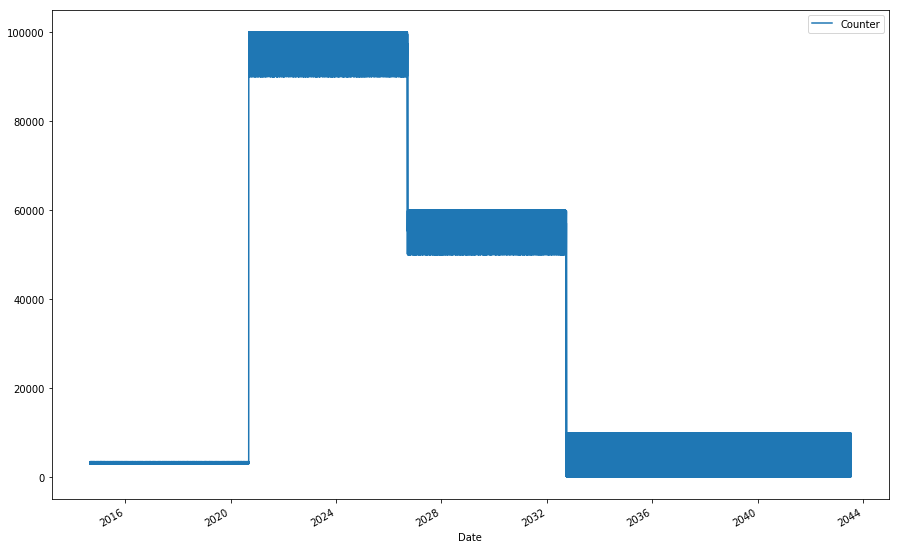

In [39]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


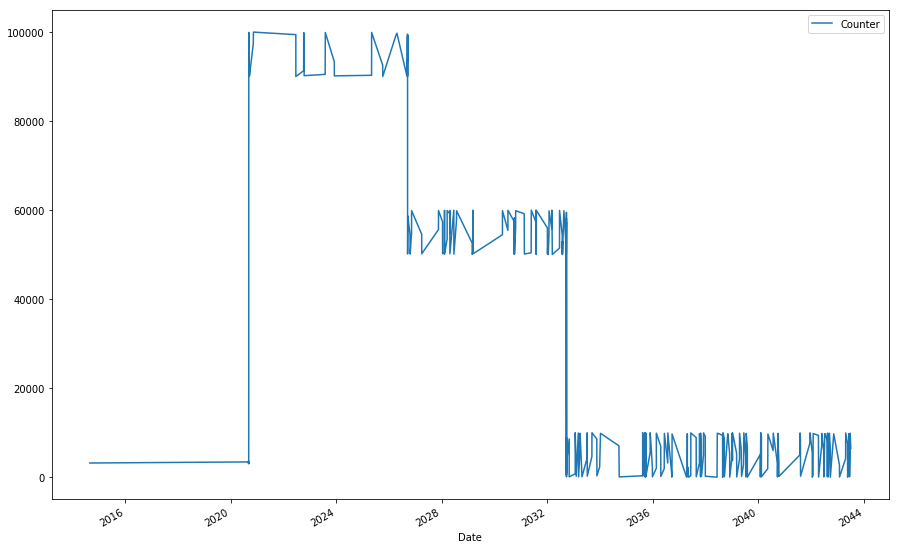

In [40]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


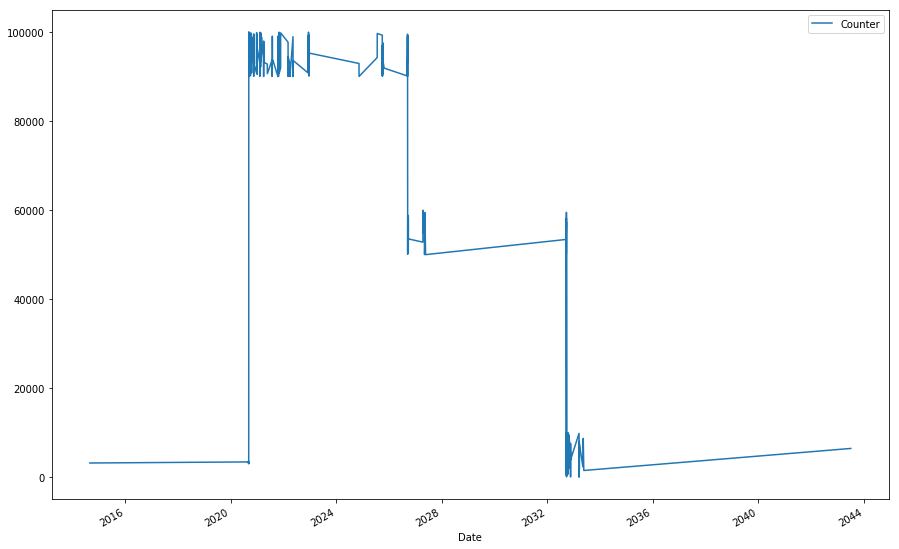

In [41]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


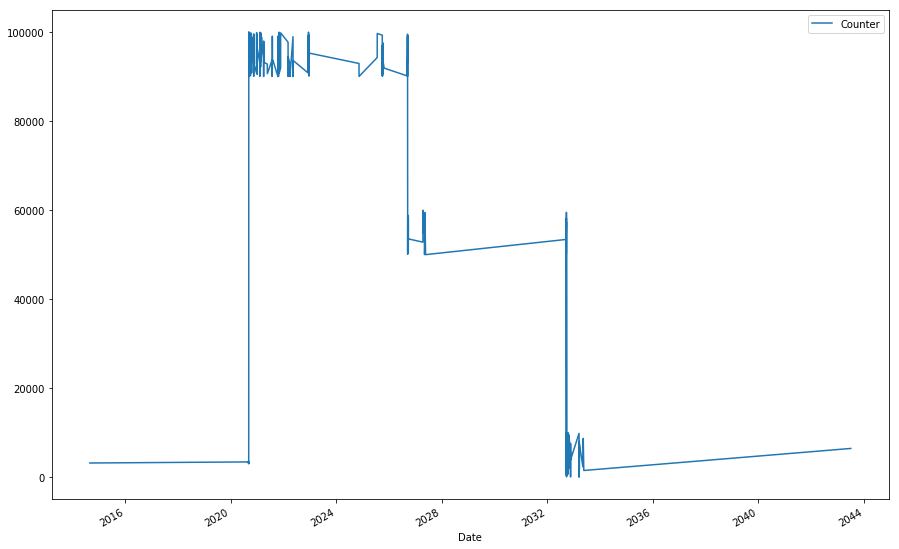

In [42]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()